<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def f(x):
  return (x-50)**2

In [86]:
# generate data
import random
X = []
Y = []
label = []
for i in range(400):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)

In [87]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  global X,Y, accuracy

  r = int(len(X)*0.9)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))

    MSE += (sum1/sum0-Y_val[sample])**2

  return  MSE/(len(X)-r)

In [70]:
def d(A):
  return train_step(abs(A),30)
train_grad = grad(d)

In [88]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

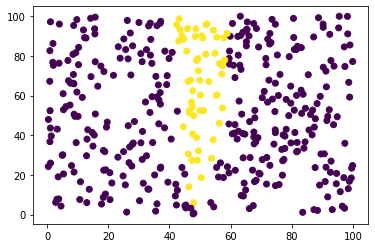

In [92]:
plt.scatter(X[:,0],X[:,1],c=Y) #xkouruankun nanshou chaojisuan xkoutttttkun ruanhuxi yanyang ttxkouhuxizhangkun huang tanxaoixoaikmaikandaoskou xkoukunyachiruantt zhege tumeicuo suoruanruanurunttkunsuoyizhendeshishukjucuolejiumaijianchaxkouxkouruanku
#xkouttxkouxueyakunnashouzhang weism wo xianzai shuffle haikeyieng jishishi random shuffleyekeyi nashismcuolexkou runhaishifenxi xkouxkou ttfaruankuneix huxi duzi nashou zang kun zheyiqieeixnkun znaghuangfaruanhuxi chajixiaiayangdaduhaishimeiulunanashismshidhouhuiuluan

In [81]:
np.random.shuffle(indexs) 
X = X[indexs]
Y = Y[indexs] 
#zhinnongyigejiuhuilunandiao tt xueyakun zhiqiqnzenmehuishiweism shuffeyicizhihoujiubuxlekun yijinglinguoyihuile

In [ ]:
#mmenshenghuangxkouniaokun ttnanshoudeiziizo walmartkunniaoduzi ttnanshouhuangttduzixueyakun zhsouzan

In [ ]:
# ruanzhendexkou buxipaitupianshidui de xueyaxueyatttttxueyakun numpybushuruan

In [93]:
# np.random.shuffle(indexs) xianshuffle yebuxin jiushuom? shouzhizhang shuoming gaoluan le a meiyou shulle Y? dengdeng you a xiaminjiuyou kuzizang peng yi zixko
A = np.array([1.0,1.0])
losses = []
for epoches in range(30): 
  losssum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*0.1 #indexnzhengquedehuakeyiconverge
    loss = train_step(A,30) 
    losssum+=loss
    shuffle(indexs)  #xianzai you shuffle buziyebijiaoxiao 01.kunkouke sihuyouyidianidanjiang
    X = X[indexs]
    Y = Y[indexs] 
  losses.append(losssum)
  print(losssum)
 

0.59671718251766
0.5949766178850331
0.5920973347253852
0.5934441240333307
0.5940399592674391
0.5931372844573369
0.5922377898150697
0.5913438217016379
0.5904547224740304
0.5904243427751256
0.5915260845964854
0.590633631477741
0.5898085003930864
0.5885512403317917
0.5850740272674849
0.5841534145843873
0.5832400824838219
0.5823319035412102
0.5814260876566275
0.5804822596817969
0.5790554543817387
0.5782333786872894
0.5802171312881826
0.5782498502555418
0.5770032188700305
0.5761265174467789
0.5752971186836303
0.5732373286427468
0.5711826929015451
0.5675631943844361


In [33]:
np.random.shuffle(indexs) #aaaaakunkunkunkouke gaomingbao le zhegeshibufanhui de womendeshifanhuide fadoufaruankun koke suoyiwomendeqishimeigenggaiyoushizhegewentiquanhsnegruan

#ttttxueyakunttdanshikaishishuffleyiciyousmwentis

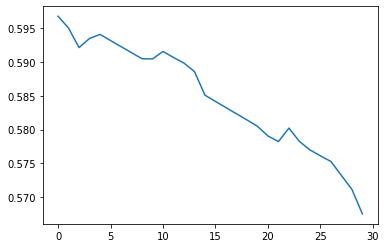

In [94]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [28]:
A

array([1.69310372, 0.03545942])